<img src='../img/dust_banner.png' alt='Training school and workshop on dust' align='center' width='100%'></img>

<br>

# 04 - Practical exercise - Model I

### About

> In [Practical exercise 2](../05_practicals/52_exercise.ipynb) we used satellite data to look at global seasonal cycles. Today, we will once again broaden our perspective and use model data to analyse the annual cycle and seasonality of dust and aerosols at a specific location.




### Tasks

#### 1. Brainstorm
  * What data can be used for analysing the annual cycle and patterns of dust?
  * What aggregation level is required?
  * What are some differences between forecast and reanalysis model data? 

#### 2. Download and plot time-series of AERONET data for *Granada, Spain* in 2021
  * **Hint** 
    * [AERONET - Example notebook](../04_data_workflows/42_groundbased_observations/421_AERONET.ipynb)
    * you can select daily aggregates of the station observations with setting `AVG=20`
  * **Interpret the results:**
    * Have there been other times in 2021 with increased AOD values?
    * If yes, how could you find out if the increase in AOD is caused by dust? Try to find out by visualizing the AOD time-series together with another parameter from the AERONET data.
    * [MSG SEVIRI Dust RGB](https://sds-was.aemet.es/forecast-products/dust-observations/msg-2013-eumetsat) and [MODIS RGB](https://worldview.earthdata.nasa.gov/) quick looks might be helpful to get a more complete picture of other events that might have happened in 2021.


#### 3. Download CAMS global reanalysis (EAC4) and select 2021 time-series for *Granada, Spain*
  * **Hint**
    * [CAMS global reanalysis - Example notebook](../04_data_workflows/43_model_data/432_CAMS_global_reanalysis_duaod_load_browse.ipynb)
    * [Data access](https://ads.atmosphere.copernicus.eu/cdsapp#!/dataset/cams-global-reanalysis-eac4?tab=form) with the following specifications:
    > Variable on single levels: `Dust aerosol optical depth at 550 nm` <br>
    > Date: `Start=2021-01-01`, `End=2021-12-31` <br>
    > Time: `[00:00, 03:00, 06:00, 09:00, 12:00, 15:00, 18:00, 21:00]` <br>
    > Restricted area: `N: 71, W: -22, E: 43, S: 28` <br>
    >Format: `netCDF` <br>
    * With the xarray function `sel()` and keyword argument `method='nearest'` you can select data based on coordinate information
    * We also recommend you to transform your xarray.DataArray into a pandas.DataFrame with the function `to_dataframe()`

#### 4. Resample AERONET observations and CAMS reanalysis (EAC4) time-series for *Granada, Spain* in 2021 and plot monthly aggregates in one plot
  * Load the time-series of daily aggregated AERONET observations and CAMS reanalysis (EAC4) for Granada, Spain in 2021, resample the values to monthly averages and plot the monthly averaged values together in one plot
  * **Hint** 
    * Make use of AERONET `index` and `time` columns to create a `DateTimeIndex` in order to resample the observations to a monthly temporal resolution
    * you have to combine the two columns `index` and `time` as one string variable
    * you can use the pandas function `to_datetime()` to create a `DateTimeIndex` and the function `resample().mean()` to resample and average the time-series to a given temporal resolution 
  * **Question to reflect on**
    * How many row entries does the resampled data frame have?
    
#### 5. BONUS: Extract a time-series from the monthly gridded Dust AOD C3S aerosol properties data for *Granada, Spain* from METOP-C and add it to the plot. 
  * Use the same download specifications or the same data in Practical 2

#### 6. Interpret the plotting results
  * Do the monthly patterns of AERONET observations and CAMS reanalysis look similar?
  * How do they differ?

### Module outline
* [1 - Select latitude / longitude values for Granada, Spain](#select_lat_lon)
* [2 - Download and plot time-series of AERONET data](#download_aeronet)
* [3 - Download CAMS global reanalysis (EAC4) and select 2021 time-series for Granada, Spain](#download_cams_reanalysis)
* [4 - Resample AERONET and CAMS reanalysis (EAC4) time-series for Granada, Spain in 2021 and plot monthly aggregates in one plot](#aeronet_cams_ts)
* [5 - BONUS: Extract a time-series from the monthly gridded C3S aerosol properties data for Granada, Spain and add it to the plot](#add_iasi_ts)

<hr>

##### Load required libraries

In [1]:
import xarray as xr
import pandas as pd
import wget
from datetime import datetime

from IPython.display import HTML

import matplotlib.pyplot as pl
import matplotlib.colors
from matplotlib.cm import get_cmap
from matplotlib import animation
from matplotlib.axes import Axes

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

##### Load helper functions

In [2]:
%run ../functions.ipynb

<hr>

<br>

### <a id='select_lat_lon'></a>1. Select latitude / longitude values for `Granada`

You can see an overview of all available AERONET Site Names [here](https://aeronet.gsfc.nasa.gov/cgi-bin/draw_map_display_aod_v3?long1=-180&long2=180&lat1=-90&lat2=90&multiplier=2&what_map=4&nachal=1&formatter=0&level=3&place_code=10&place_limit=0).

In [96]:
lat = 37.164
lon = -3.605

<br>

### <a id='download_aeronet'></a>2. Download and plot time-series of AERONET data

In [5]:
# Create data dict to download the data
data_dict = {
    'endpoint': 'https://aeronet.gsfc.nasa.gov/cgi-bin/print_web_data_v3',
    'station':'Granada',
    'year': 2021,
    'month': 1,
    'day': 1,
    'year2': 2021,
    'month2': 12,
    'day2': 31,
    'AOD20': 1,
    'AVG': 20
}
url = '{endpoint}?site={station}&year={year}&month={month}&day={day}&year2={year2}&month2={month2}&day2={day2}&AOD20={AOD20}&AVG={AVG}'.format(**data_dict)
wget.download(url, './Data/Aeronet/2021_granada_aod20_20.txt')

'./Data/Aeronet/2021_granada_aod20_20.txt'

In [8]:
# Read data
df_aer = pd.read_table('./Data/Aeronet/2021_granada_aod20_20.txt', delimiter=',', header=[7], index_col=1)
df_aer.columns

Index(['AERONET_Site', 'Time(hh:mm:ss)', 'Day_of_Year', 'AOD_1640nm',
       'AOD_1020nm', 'AOD_870nm', 'AOD_865nm', 'AOD_779nm', 'AOD_675nm',
       'AOD_667nm', 'AOD_620nm', 'AOD_560nm', 'AOD_555nm', 'AOD_551nm',
       'AOD_532nm', 'AOD_531nm', 'AOD_510nm', 'AOD_500nm', 'AOD_490nm',
       'AOD_443nm', 'AOD_440nm', 'AOD_412nm', 'AOD_400nm', 'AOD_380nm',
       'AOD_340nm', 'Precipitable_Water(cm)', 'AOD_681nm', 'AOD_709nm',
       'AOD_Empty', 'AOD_Empty.1', 'AOD_Empty.2', 'AOD_Empty.3', 'AOD_Empty.4',
       '440-870_Angstrom_Exponent', '380-500_Angstrom_Exponent',
       '440-675_Angstrom_Exponent', '500-870_Angstrom_Exponent',
       '340-440_Angstrom_Exponent', '440-675_Angstrom_Exponent[Polar]',
       'N[AOD_1640nm]', 'N[AOD_1020nm]', 'N[AOD_870nm]', 'N[AOD_865nm]',
       'N[AOD_779nm]', 'N[AOD_675nm]', 'N[AOD_667nm]', 'N[AOD_620nm]',
       'N[AOD_560nm]', 'N[AOD_555nm]', 'N[AOD_551nm]', 'N[AOD_532nm]',
       'N[AOD_531nm]', 'N[AOD_510nm]', 'N[AOD_500nm]', 'N[AOD_490nm]',
 

In [12]:
# Create nans
df_aer = df_aer.replace(-999.0, np.nan)

In [15]:
#%% matplotlib parameters
matplotlib.rcParams['xtick.labelsize'] = 14
matplotlib.rcParams['ytick.labelsize'] = 14
matplotlib.rcParams['font.size'] = 16

Text(0, 0.5, 'Angstrom exp.')

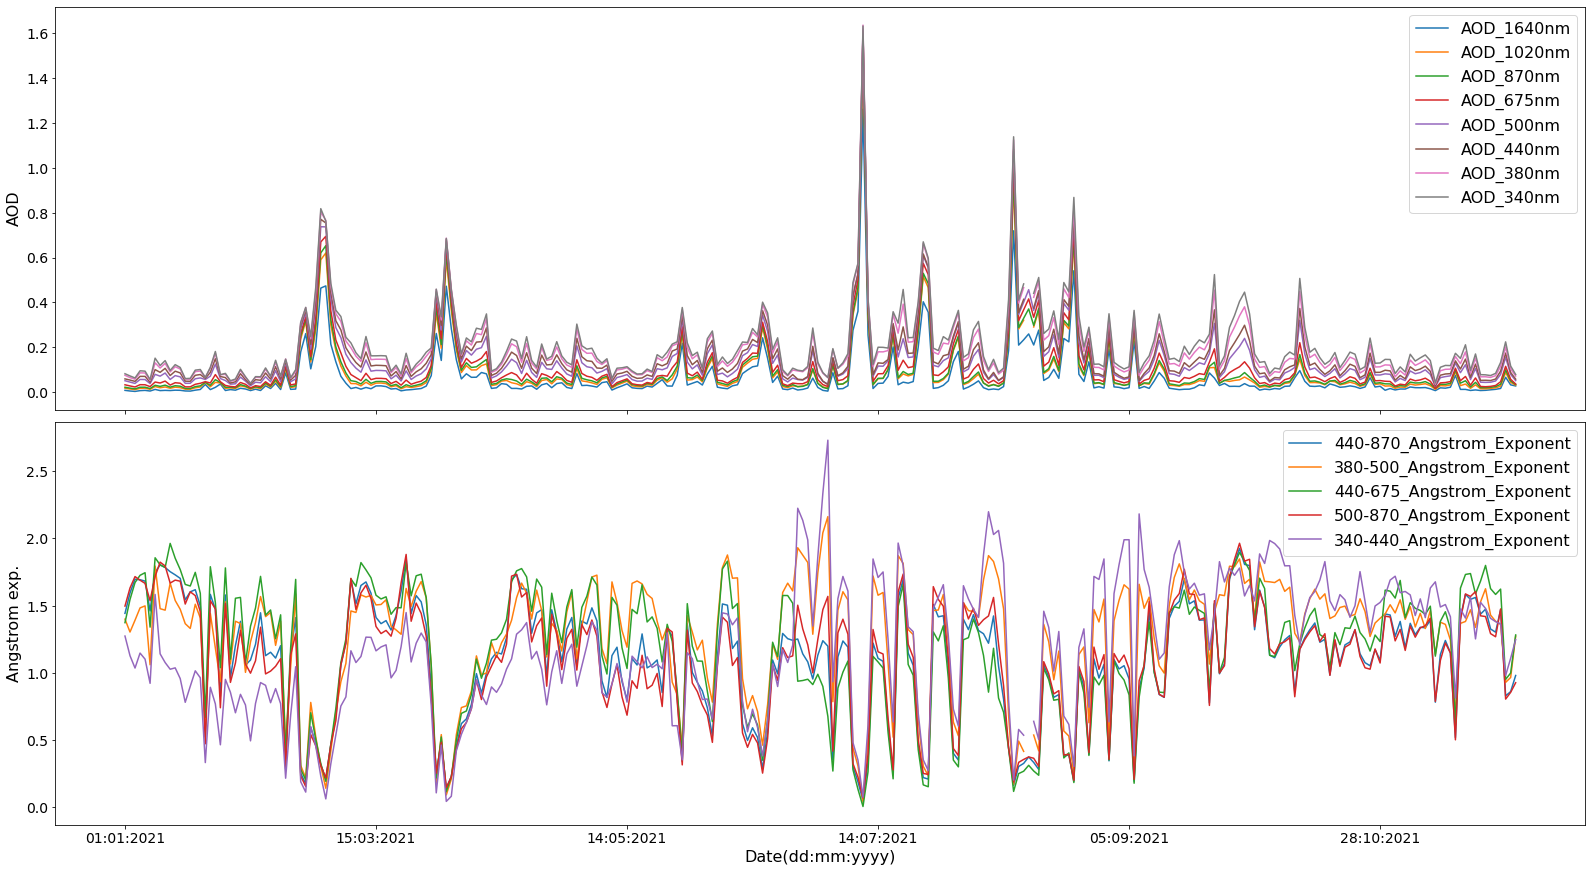

In [18]:
# Plot data
fig, axs = plt.subplots(figsize=(22,12),nrows=2,constrained_layout =True, sharex = True)

df_aer[['AOD_1640nm', 
           'AOD_1020nm', 
           'AOD_870nm', 
           'AOD_675nm', 
           'AOD_500nm', 
           'AOD_440nm', 
           'AOD_380nm', 
           'AOD_340nm']].plot(ax = axs[0])
df_aer[['440-870_Angstrom_Exponent', '380-500_Angstrom_Exponent',
       '440-675_Angstrom_Exponent', '500-870_Angstrom_Exponent',
       '340-440_Angstrom_Exponent']].plot(ax = axs[1])
axs[0].set_ylabel('AOD')
axs[1].set_ylabel('Angstrom exp.')

<br>

### <a id='download_cams_reanalysis'></a> 3. Download CAMS global reanalysis (EAC4) and select 2021 time-series for Granada, Spain

In [19]:
url = 'https://ads.atmosphere.copernicus.eu/api/v2'
key = '12714:ce643f0d-6679-4f36-8c32-a8c225ffe63a'

In [20]:
import cdsapi

c = cdsapi.Client(url = url, key = key)

c.retrieve(
    'cams-global-reanalysis-eac4',
    {
        'format': 'netcdf',
        'variable': 'dust_aerosol_optical_depth_550nm',
        'date': '2021-01-01/2021-12-31',
        'time': [
            '00:00', '03:00', '06:00',
            '09:00', '12:00', '15:00',
            '18:00', '21:00',
        ],
        'area': [
            71, 22, 28,
            43,
        ],
    },
    './Data/Cams/download.nc')

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ads.atmosphere.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
2023-03-03 12:32:27,345 INFO Welcome to the CDS
2023-03-03 12:32:27,346 INFO Sending request to https://ads.atmosphere.copernicus.eu/api/v2/resources/cams-global-reanalysis-eac4
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ads.atmosphere.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
2023-03-03 12:32:27,367 INFO Request is queued
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being 

Result(content_length=9836000,content_type=application/x-netcdf,location=https://download-0003-ads-clone.copernicus-climate.eu/cache-compute-0003/cache/data2/adaptor.mars.internal-1677846862.0172668-21660-8-928d4f80-5348-4284-8b6b-9f6f5814d0e4.nc)

<br>

In [26]:
# Load data
AOD_CAMS = xr.open_dataset('./Data/Cams/download.nc')
AOD_CAMS

<xarray.Dataset>
Dimensions:    (longitude: 29, latitude: 58, time: 2920)
Coordinates:
  * longitude  (longitude) float32 22.0 22.75 23.5 24.25 ... 41.5 42.25 43.0
  * latitude   (latitude) float32 70.75 70.0 69.25 68.5 ... 29.5 28.75 28.0
  * time       (time) datetime64[ns] 2021-01-01 ... 2021-12-31T21:00:00
Data variables:
    duaod550   (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-03 12:34:27 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [56]:
# Select Granada
AOD_CAMS_GR = AOD_CAMS.sel(longitude = lon, latitude = lat, method = 'nearest')
# Convert to df
df_AOD_CAMS_GR = AOD_CAMS_GR.to_dataframe()
df_AOD_CAMS_GR['Month'] = df_AOD_CAMS_GR.index.month
# Groupby
dfgr_AOD_CAMS_GR = df_AOD_CAMS_GR[['duaod550','Month']].groupby('Month').mean()
dfgr_AOD_CAMS_GR['Q25'] = df_AOD_CAMS_GR[['duaod550','Month']].groupby('Month').quantile(0.25)
dfgr_AOD_CAMS_GR['Q75'] = df_AOD_CAMS_GR[['duaod550','Month']].groupby('Month').mean(0.75)
dfgr_AOD_CAMS_GR['Median'] = df_AOD_CAMS_GR[['duaod550','Month']].groupby('Month').median()

In [82]:
df_aer_sel = pd.DataFrame({'AOD':df_aer['AOD_500nm']})
#pd.to_datetime(df_aer.index, dayfirst = True)
#pd.to_datetime(str(df_aer.index).replace(':','-'), dayfirst = True)
df_aer_sel.index = pd.to_datetime(df_aer_sel.index.str.replace(':','-'), dayfirst = True)
df_aer_sel['Month'] = df_aer_sel.index.month
# Groupby
dfgr_aer_sel = df_aer_sel.groupby('Month').mean()
dfgr_aer_sel['Q25'] = df_aer_sel.groupby('Month').quantile(0.25)
dfgr_aer_sel['Q75'] = df_aer_sel.groupby('Month').mean(0.75)
dfgr_aer_sel['Median'] = df_aer_sel.groupby('Month').median()

In [90]:
dfgr_aer_sel

,AOD,Q25,Q75,Median
Month,,,,
1.0,0.060234,0.048476,0.060234,0.057051
2.0,0.116791,0.046737,0.116791,0.059621
3.0,0.222881,0.091602,0.222881,0.107459
4.0,0.135056,0.093356,0.135056,0.132749
5.0,0.105320,0.067029,0.105320,0.096602
6.0,0.131016,0.067533,0.131016,0.102855
7.0,0.253548,0.109404,0.253548,0.153570
8.0,0.261196,0.089151,0.261196,0.190499
9.0,0.127953,0.075958,0.127953,0.103457


Text(0, 0.5, 'AOD')

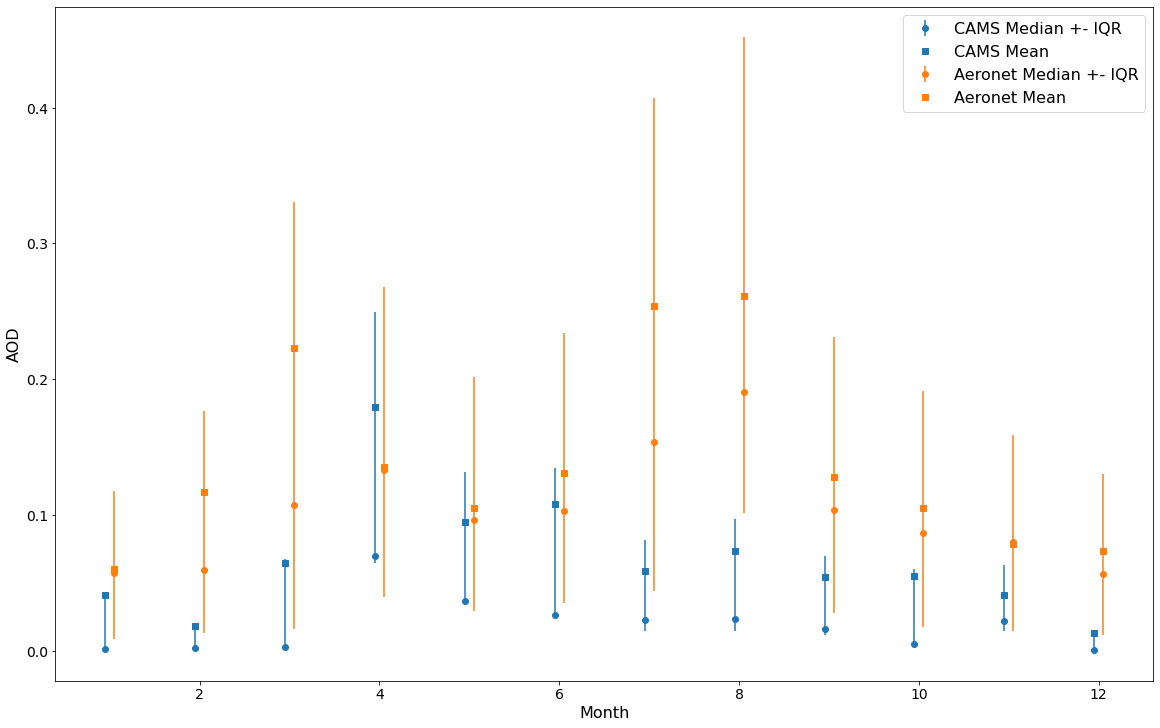

In [95]:
#boxplot = df_AOD_CAMS_GR[['duaod550','Month']].boxplot(by='Month')
fig, axs = plt.subplots(figsize = (16, 10), constrained_layout = True)
l1 = axs.errorbar(dfgr_AOD_CAMS_GR.index-0.05, dfgr_AOD_CAMS_GR['Median'], yerr = [dfgr_AOD_CAMS_GR.Q25, dfgr_AOD_CAMS_GR.Q75], fmt = 'o')
l2, = axs.plot(dfgr_AOD_CAMS_GR.index-0.05, dfgr_AOD_CAMS_GR['duaod550'], 's', c = 'C0')
l3 = axs.errorbar(dfgr_aer_sel.index+0.05, dfgr_aer_sel['Median'], yerr = [dfgr_aer_sel.Q25, dfgr_aer_sel.Q75], fmt = 'o', color = 'C1')
l4, = axs.plot(dfgr_aer_sel.index+0.05, dfgr_aer_sel['AOD'], 's', c = 'C1')

axs.legend((l1,l2,l3,l4),('CAMS Median +- IQR', 'CAMS Mean', 'Aeronet Median +- IQR', 'Aeronet Mean'))
axs.set_xlabel('Month')
axs.set_ylabel('AOD')

### <a id='aeronet_cams_ts'></a>4. Resample AERONET and CAMS reanalysis (EAC4) time-series for Granada, Spain in 2021 and plot monthly aggregates

<br>

### <a id='add_iasi_ts'></a> 5. BONUS: Extract a time-series from the Dust AOD monthly gridded C3S aerosol properties data for *Granada, Spain* and add it to the plot.   

<br>

<hr>

<img src='../img/copernicus_logo.png' alt='Logo EU Copernicus' align='left' width='20%'><br><br><br><br>
This project is licensed under <a href="../../LICENSE">GNU General Public License v3.0 only</a> and is developed under a Copernicus contract.

<p style="text-align:right;"> <a href='https://training.eumetsat.int'>EUMETSAT Training</a> | <a href='mailto:training@eumetsat.int'>Contact the training team</a></p>